In [25]:
import numpy as np
import random
import itertools
from collections import defaultdict
#CONTENT CATALOGUE
#number of content items
K=50
#content relativity matrix
#u_ij=np.zeros((K,K))
u_ij = np.random.rand(K, K)
#percentage of cached items
C=0.2*K
C=int(C)
#cache
cache=[0]*C
#content relevance threshold
u_min=0.5
#USER MODEL
#number of recomendations
N=2
#probability of ending viewing session
q=0.02
#probability of picking one item with equal prob. in case all are relevant
alpha=0.9
#probability when the user chooses from K items
p_k=1/K

actions=[]
actions_initialized=0
actions_num=[]


#state action space

def nested_dict():
    return defaultdict(nested_dict)
Space=nested_dict()


#def initialize_cache():
  #initialize cache
  #for i in range(0,C):
      #cache[i]=i+30
#initializes cache by creating a list of set size with randomly chozen items inside
def initialize_cache():
   items_in_cache = random.sample(list(range(K)), C)
   for i in range(len(items_in_cache)):
    cache[i]=items_in_cache[i]

#arbitrarily chosen cache for hand-picked scenario
def initialize_optimality_test_cache():
  global cache
  cache=list(range(0,int(K/2)))


def initialize_relativity_matrix():
  #content relativity matrix initializations
  for i in range(K):
    for j in range(0, i):
        u_ij[i][j] = u_ij[j][i]
    u_ij[i][i] = 0

#relativity matrix for hand-picked scenario, all items have relativity 1 with item zero and 0 relatiity elsewhere
def initialize_optimality_test_relativity_matrix():
  #content relativity matrix initializations
  global u_ij
  u_ij = np.zeros((K,K))

  u_ij[:][0] = 1
  for i in range(K):
    for j in range(0, i):
        u_ij[i][j] = u_ij[j][i]
    u_ij[i][i] = 0

#define cost if not in cache
def item_cost(item):
  if item in cache:
    return 0
  else:
    return -1

#check if all items are above u_min
def all_bigger_than_u_min(current_item,recommended_items):
  for i in recommended_items:
    relevance=u_ij[i,current_item]
    if(relevance<u_min):
      return False
  return True


# creates a dictionary with similar structure with the given frozen lake code on eclass
def initialize_state_action_space():
  for state in range(K):
    #print(state)
    items = list(range(K))
    other_items = items.copy()
    #other_items.remove(state)
    recommended_combinations = list(itertools.combinations(other_items, N)) #all possible N combinations of states as action space
    #initialize action space
    for item_set in recommended_combinations:
          item_set_str = [str(item) for item in item_set]  # Convert integers to strings
          action_name = '-'.join(item_set_str)  #action name consists of the included items in increasing order
          action_outcomes_list=[] #here will be appended all the actions with transition probabilities etc
          global actions_initialized
          if actions_initialized == 0:
            actions.append(action_name)
            actions_num.append(item_set)

          #define action outcome based on probabilities given
          if(state in item_set):
            for i in other_items:
              action_outcomes_list.append((0,0,0,False))
          elif all_bigger_than_u_min(state,item_set):
            #print(action_name)
            #print(state)
            prob_of_picking_recommended=(1/N)*alpha*(1-q)
            prob_of_picking_random=p_k*(1-alpha)*(1-q)
            for i in other_items:
              if i in item_set:
                action_outcomes_list.append((prob_of_picking_recommended,i,item_cost(i),False))
              else:
                action_outcomes_list.append((prob_of_picking_random,i,item_cost(i),False))

            #print(state)
          else:
            for i in other_items:
              prob_of_picking_random=p_k*(1-q)
              action_outcomes_list.append((prob_of_picking_random,i,item_cost(i),False))
          #add terminal state of user closing the app
          action_outcomes_list.append((q,0,0,True))#with some probability end session
          Space[state][action_name]=action_outcomes_list
  actions_initialized=1


initialize_relativity_matrix() #vanilla version
initialize_cache() #vanilla version
#initialize_optimality_test_relativity_matrix() #use to test optimality, if optimal all results will contain item 0 in the (except from when we are at zero)
#initialize_optimality_test_cache()  #use to test optimality
print(cache)
initialize_state_action_space()
print(Space[6])


[7, 29, 41, 20, 38, 24, 39, 44, 46, 11]
defaultdict(<function nested_dict at 0x7fadeaa979a0>, {'0-1': [(0.0196, 0, -1, False), (0.0196, 1, -1, False), (0.0196, 2, -1, False), (0.0196, 3, -1, False), (0.0196, 4, -1, False), (0.0196, 5, -1, False), (0.0196, 6, -1, False), (0.0196, 7, 0, False), (0.0196, 8, -1, False), (0.0196, 9, -1, False), (0.0196, 10, -1, False), (0.0196, 11, 0, False), (0.0196, 12, -1, False), (0.0196, 13, -1, False), (0.0196, 14, -1, False), (0.0196, 15, -1, False), (0.0196, 16, -1, False), (0.0196, 17, -1, False), (0.0196, 18, -1, False), (0.0196, 19, -1, False), (0.0196, 20, 0, False), (0.0196, 21, -1, False), (0.0196, 22, -1, False), (0.0196, 23, -1, False), (0.0196, 24, 0, False), (0.0196, 25, -1, False), (0.0196, 26, -1, False), (0.0196, 27, -1, False), (0.0196, 28, -1, False), (0.0196, 29, 0, False), (0.0196, 30, -1, False), (0.0196, 31, -1, False), (0.0196, 32, -1, False), (0.0196, 33, -1, False), (0.0196, 34, -1, False), (0.0196, 35, -1, False), (0.0196, 36,

Key: 0, Item: 38-43
Key: 1, Item: 19-43
Key: 2, Item: 24-41
Key: 3, Item: 5-38
Key: 4, Item: 0-22
Key: 5, Item: 16-43
Key: 6, Item: 23-34
Key: 7, Item: 7-22
Key: 8, Item: 23-48
Key: 9, Item: 4-31
Key: 10, Item: 30-40
Key: 11, Item: 1-3
Key: 12, Item: 19-30
Key: 13, Item: 8-32
Key: 14, Item: 23-47
Key: 15, Item: 17-28
Key: 16, Item: 43-49
Key: 17, Item: 15-21
Key: 18, Item: 2-26
Key: 19, Item: 16-19
Key: 20, Item: 4-27
Key: 21, Item: 9-25
Key: 22, Item: 5-29
Key: 23, Item: 46-48
Key: 24, Item: 3-19
Key: 25, Item: 28-47
Key: 26, Item: 16-32
Key: 27, Item: 42-47
Key: 28, Item: 5-36
Key: 29, Item: 12-43
Key: 30, Item: 3-25
Key: 31, Item: 12-16
Key: 32, Item: 38-49
Key: 33, Item: 9-27
Key: 34, Item: 36-39
Key: 35, Item: 17-24
Key: 36, Item: 9-15
Key: 37, Item: 5-22
Key: 38, Item: 10-21
Key: 39, Item: 2-45
Key: 40, Item: 28-42
Key: 41, Item: 4-37
Key: 42, Item: 19-28
Key: 43, Item: 27-45
Key: 44, Item: 30-43
Key: 45, Item: 9-44
Key: 46, Item: 11-21
Key: 47, Item: 5-27
Key: 48, Item: 8-36
Key

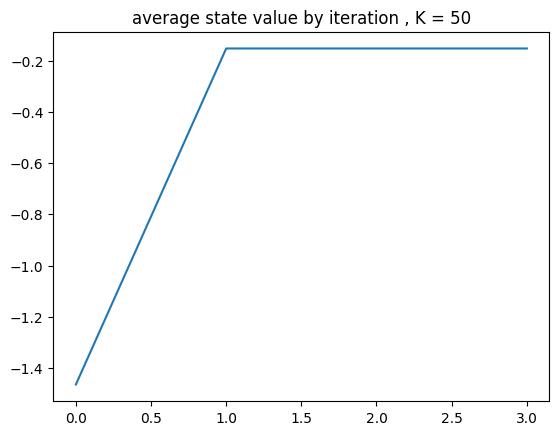

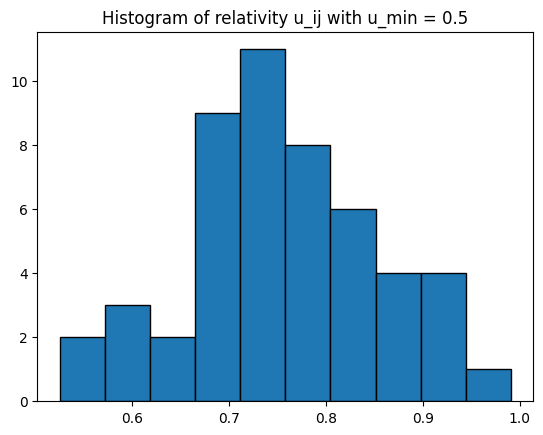

In [29]:
import tkinter as tk #loads standard python GUI libraries
import numpy as np
import time
import random
import array
import matplotlib.pyplot as plt

P=Space.copy()

# The next few lines are mostly for accounting
Tmax = 100000
size = len(P)


t = 0

average_value=[] #for use later in average state value plot


#this one is generic to be applied in many AI gym compliant environments

def policy_evaluation(pi, P, gamma = 1.0, epsilon = 1e-10):  #inputs: (1) policy to be evaluated, (2) model of the environment (transition probabilities, etc., see previous cell), (3) discount factor (with default = 1), (4) convergence error (default = 10^{-10})
    t = 0   #there's more elegant ways to do this
    prev_V = np.zeros(len(P)) # use as "cost-to-go", i.e. for V(s')
    #print(len(P[0]))
    while True:
        V = np.zeros(len(P)) # current value function to be learnerd
        for s in range(len(P)):  # do for every state
            for prob, next_state, reward, done in P[s][pi(s)]:  # calculate one Bellman step --> i.e., sum over all probabilities of transitions and reward for that state, the action suggested by the (fixed) policy, the reward earned (dictated by the model), and the cost-to-go from the next state (which is also decided by the model)
                V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))
        if np.max(np.abs(prev_V - V)) < epsilon: #check if the new V estimate is close enough to the previous one;
            break # if yes, finish loop
        prev_V = V.copy() #freeze the new values (to be used as the next V(s'))
        t += 1
    #print(len(P[0]))
    return V

def policy_improvement(V, P, gamma=1.0):  # takes a value function (as the cost to go V(s')), a model, and a discount parameter
    Q = np.zeros((len(P), len(P[0])), dtype=np.float64) #create a Q value array\
    action_index=[] #BASICALLY THE MAIN CHANGE IN THE GIVEN CODE, because actions are represented my strings e.g. 5-7 create an index for compatibility
    for s in range(len(P)):        # for every state in the environment/model
        action_counter=0
        for a in list(P[0].keys()):  # and for every action in that state
            action_index.append(a)
            for prob, next_state, reward, done in P[s][a]:  #evaluate the action value based on the model and Value function given (which corresponds to the previous policy that we are trying to improve)
                Q[s][action_counter] += prob * (reward + gamma * V[next_state] * (not done))
                if s in actions_num[action_counter]:
                  Q[s][action_counter]=float('-inf')
            action_counter+=1
    new_pi_dict = {}
    Q_argmax = np.argmax(Q, axis=1)

    for s, a in enumerate(Q_argmax):
        new_pi_dict[s] = action_index[a]
        #print(action_index[a])

    new_pi = lambda s: new_pi_dict[s]  # this basically creates the new (improved) policy by choosing at each state s the action a that has the highest Q value (based on the Q array we just calculated)
    return new_pi

# policy iteration is simple, it will call alternatively policy evaluation then policy improvement, till the policy converges.

def policy_iteration(P, gamma = 1.0, epsilon = 1e-10):
    t = 0
    random_actions = np.random.choice(tuple(P[0].keys()), len(P))     # start with random actions for each state
    pi = lambda s: {s:a for s, a in enumerate(random_actions)}[s]     # and define your initial policy pi_0 based on these action (remember, we are passing policies around as python "functions", hence the need for this second line)

    while True:
        P_opt_dict = {s: pi(s) for s in range(K)}
        for key in P_opt_dict:
            item = P_opt_dict[key]
            print(f"Key: {key}, Item: {item}")
        old_pi = {s: pi(s) for s in range(len(P))}  #keep the old policy to compare with new
        V = policy_evaluation(pi,P,gamma,epsilon)   #evaluate latest policy --> you receive its converged value function        print(V)
        print(V)
        average_value.append(V)
        pi = policy_improvement(V,P,gamma)          #get a better policy using the value function of the previous one just calculated
        t += 1
        if old_pi == {s:pi(s) for s in range(len(P))}: # you have converged to the optimal policy if the "improved" policy is exactly the same as in the previous step
            break
    print('converged after %d iterations' %t) #keep track of the number of (outer) iterations to converge
    return V,pi





V_opt,P_opt = policy_iteration(P,0.5,0.001)   #just example of calling the various new functions we created.


print(V_opt)
histogram=[] #save average state value for use in histogram

#print chosen actions and relativity values
P_opt_dict = {s: P_opt(s) for s in range(len(V_opt))}
for key in P_opt_dict:
    item = P_opt_dict[key]
    print(f"Key: {key}, Item: {item}")

    items_relativity = item.split('-')
    relativity_sum=0
    for it in items_relativity:
      result = int(it)
      relativity_sum+=u_ij[result,key]

    relativity_average = relativity_sum / len(items_relativity)

    print(f'average relativity between item and action:{relativity_average}')
    histogram.append(relativity_average)
#print(u_ij)

#for plotting the average state value by iteration
value_sum=[]
for i in range(len(average_value)):
  average_value[i]=average_value[i]/len(average_value[i])
  value_sum.append(sum(average_value[i]))

plt.plot(value_sum)
plt.title(f'average state value by iteration , K = {len(average_value[i])}')
plt.show()

plt.hist(histogram, bins=10, edgecolor='black')
plt.title(f'Histogram of relativity u_ij with u_min = {u_min}')
plt.show()



